# <img style="float: left; padding-right: 20px; width: 200px" src="https://raw.githubusercontent.com/raxlab/imt2200-data/main/media/logo.jpg">  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2025-S2**<br>
**Profesor:** Rodrigo A. Carrasco <br>
---

# <h1><center>Clase 07: Extracción de datos online - URL y API</center></h1>

Este ejercicio busca que los estudiantes aprendan a usar librerias en Python para la lectura de datos desde la Web.


## 1. Introducción.

Las organizaciones y gobiernos generan y almacenan datos a través de distintos métodos y herramientas de software, cada uno con sus propios formatos y ubicaciones. El proceso Extracción, Transformación y Carga (o ETL por su acrónimo en inglés) se refiere al desarrollo de pipelines para la integración, estructuración y almacenamiento de datos provenientes de múltiples fuentes. 

La primera etapa, la de **extracción**, implica identificar las fuentes de datos requeridas (software, IoT, datos de clientes, RRSS, web analytics, etc.) y el formato de dichos datos. Esto para luego obtener en forma automatizada los datos desde la fuente original, hacia un repositorio temporal donde se realizan la  **transformación**. Esta segunda etapa se refiere a la conversión de los datos en un formato y estructura apropiada para el análisis y modelamiento.

## 2. Extracción de Datos.

Los datos de interés para un problema de ciencia de datos pueden estar ubicados en diversas fuentes: archivos en almacenamiento local o remoto, servidores de bases de datos, y la web. La clase pasada vimos que hay tres formas principales para comenzar a usar esos datos:
- URL
- API
- Scrapping.

En la web, la transmisión de información se realiza mediante el protocolo HTTP (Hypertext Transfer Protocol), diseñado para la comunicación entre los navegadores y servidores web. Sigue el clásico modelo cliente-servidor, en el que un cliente establece una conexión, realizando una petición a un servidor y espera una respuesta del mismo.

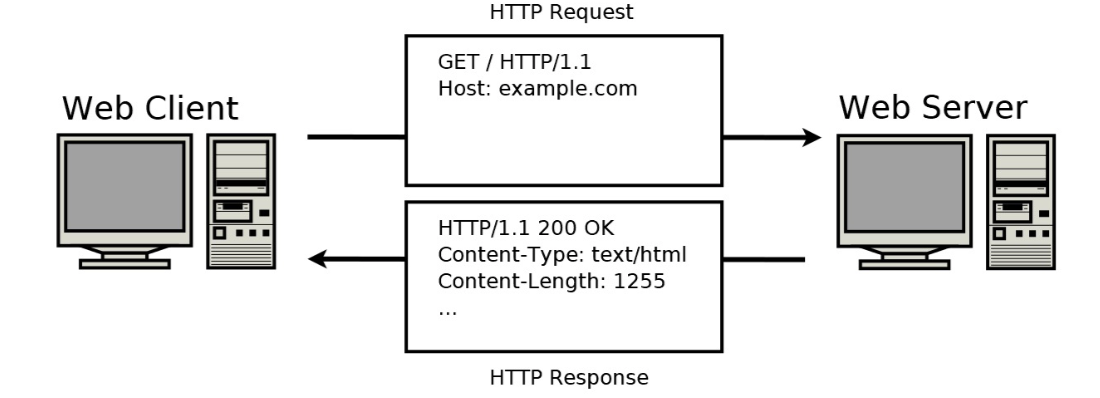

HTTP y HTTPS definen un conjunto de métodos de petición para indicar la acción que se desea realizar para un recurso determinado. Los dos métodos más usados en nuestro contexto son GET y POST:

- `GET`: el método GET  solicita una representación de un recurso específico. Las peticiones que usan el método GET sólo deben recuperar datos.
- `POST`: el método POST se utiliza para enviar una entidad a un recurso en específico, causando a menudo un cambio en el estado o efectos secundarios en el servidor.

En este ejercicio, exploraremos distintas formas de extraer datos desde la WWW, utilizando la librería de Python llamada `requests`, para enviar peticiones HTTP a un servidor (como por ejemplo pedir datos con el método GET), y recoger la respuesta en un objeto tipo `response`, que implementa métodos y atributos para leer y explorar los datos extraídos. 

La documentación se encuentra en el siguiente link:

https://docs.python-requests.org/en/latest/api/#requests.Response

Siempre que se hace un llamado a `requests.get()`, está ocurriendo dos cosas importantes. Primero, se está construyendo un objeto tipo `request`, el cual será enviado a un servidor con el fin de obtener información de éste. Segundo, un objeto `response` es generado una vez que requests obtenga una respuesta del servidor. Este nuevo objeto contiene toda la información entregada por el servidor, incluídos los datos en formato binario, así como el objeto `request` que fue creado originalmente.

## 3. Extraccion por URL

Frecuentemente, los datos que necesitamos están publicados en alguna dirección web or URL (Universal Resource Locator). Podemos descargarlos fácilmente navegando hacia dicha URL y haciendo click en un link, pero esto supone limitaciones de reproducibilidad y escalabilidad: por ejemplo, si queremos descargar muchos archivos o si queremos actualizar nuestra base de datos cada cierta cantidad de minutos o días.
 
Para automatizar el proceso, podemos utilizar códigos de Python para importar y guardar localmente datasets de la WWW, y convertirlos en DataFrames de pandas, usando la librería  `requests`. También es posible usar `pandas` directamente para leer algunos tipos de archivos mediante su URL como vimos en clases.

In [ ]:
# librerías para URL
import pandas as pd
import requests
import io, zipfile

### 3.1 Leer contenido de un archivo directamente desde su URL usando `pandas`.

En el caso de archivos en formato CSV o de Excel, podemos leer esos archivos directamente usando métodos implementados en la librería de Pandas. 

Veamos el siguiente ejemplo que nos permite acceder al repositorio del Gobierno de Chile y obtener el dato de todos los puntos de carga de tarjetas Bip!, disponible en https://datos.gob.cl/dataset/28198.

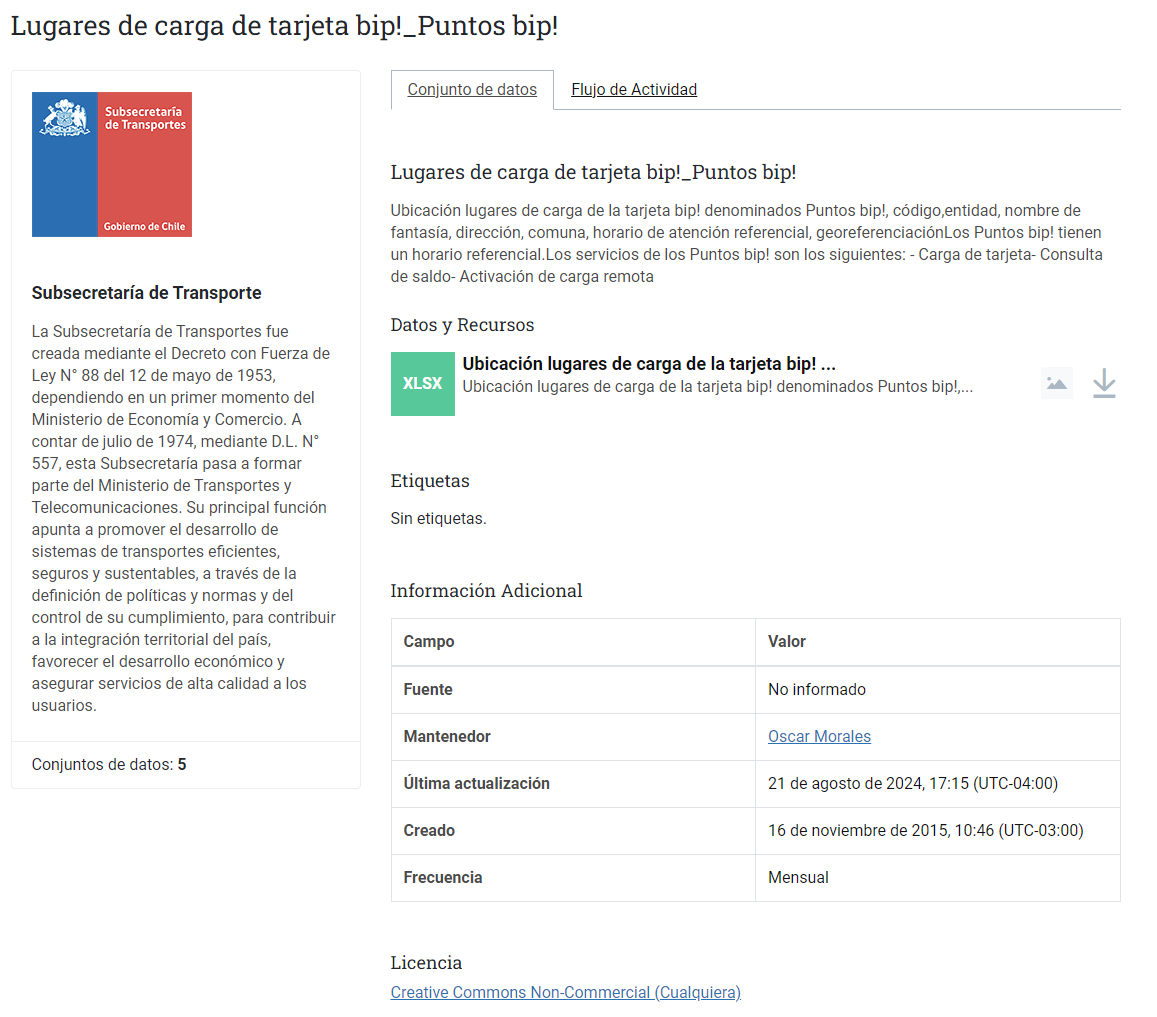

En este caso la planilla tiene 9 filas de formato y orden, por lo que podemos saltarnos esas filas para almacenar los datos realmente necesarios en nuestro DataFrame.

In [ ]:
#url del archivo
url = 'https://datos.gob.cl/dataset/c2969d8a-df82-4a6c-a1f8-e5eba36af6cf/resource/cbd329c6-9fe6-4dc1-91e3-a99689fd0254/download/pcma_20240917-oficio-4770_2013.xlsx'

#leer datos y crear un dataframe. Si se trata de un archivo en formato csv, usar pd.read_csv (o la función correspondiente al formato del archivo)
datos = pd.read_excel(url, skiprows=9)
datos.head(12)

### 3.2 Descargar un archivo directamente desde su URL usando `requests`.

Otra opción que podemos usar, y que permite acceder a todo tipo de formatos, es usando la librería `requests`. En este caso, el método `.get()` nos permite el acceso a los datos en una URL.

In [ ]:
#lo mismo que hicimos antes, pero ahora usando Requests para solicitar el recurso y guardarlo en el disco local
url = 'https://datos.gob.cl/dataset/c2969d8a-df82-4a6c-a1f8-e5eba36af6cf/resource/cbd329c6-9fe6-4dc1-91e3-a99689fd0254/download/pcma_20240917-oficio-4770_2013.xlsx'
respuesta = requests.get(url,stream=False)

In [ ]:
#la respuesta a la solicitud queda almacenada en un objeto tipo Response
respuesta

In [ ]:
#el atributo r.content tiene el contenido del archivo
respuesta.content

Ahora podemos almacenar los datos recogidos en un archivo local, como lo vimos en la clase pasada.

In [ ]:
#escribimos el contenido del objeto reponse en un archivo local en su computador
open('puntosBip.xlsx', 'wb').write(respuesta.content)

#leemos el archivo local usando pandas
df = pd.read_excel('puntosBip.xlsx', engine='openpyxl',skiprows=9)
df

En general puede ser más útil usar requests para descargar datos en formatos que no son leíbles directamente con `pandas`, pues en esos casos puede ser mejor usar directamente esta librería para leer y transformar a un DataFrame en forma más rápida.

### 3.3 Descargar archivos comprimidos

Otro caso común, es tener los datos almacenados en un archivo comprimido en formato `zip`. También existe una librería en Python, llamaa `io` que permite automatizar procesos de lectura de este tipo de archivos.

Por ejemplo, los microdatos del censo 2017 están publicados como un archivo binario comprimido (.zip). Los podemos descargar usando `requests`, pero luego lo debemos abrir como un objeto tipo byte usando la librería `io`.

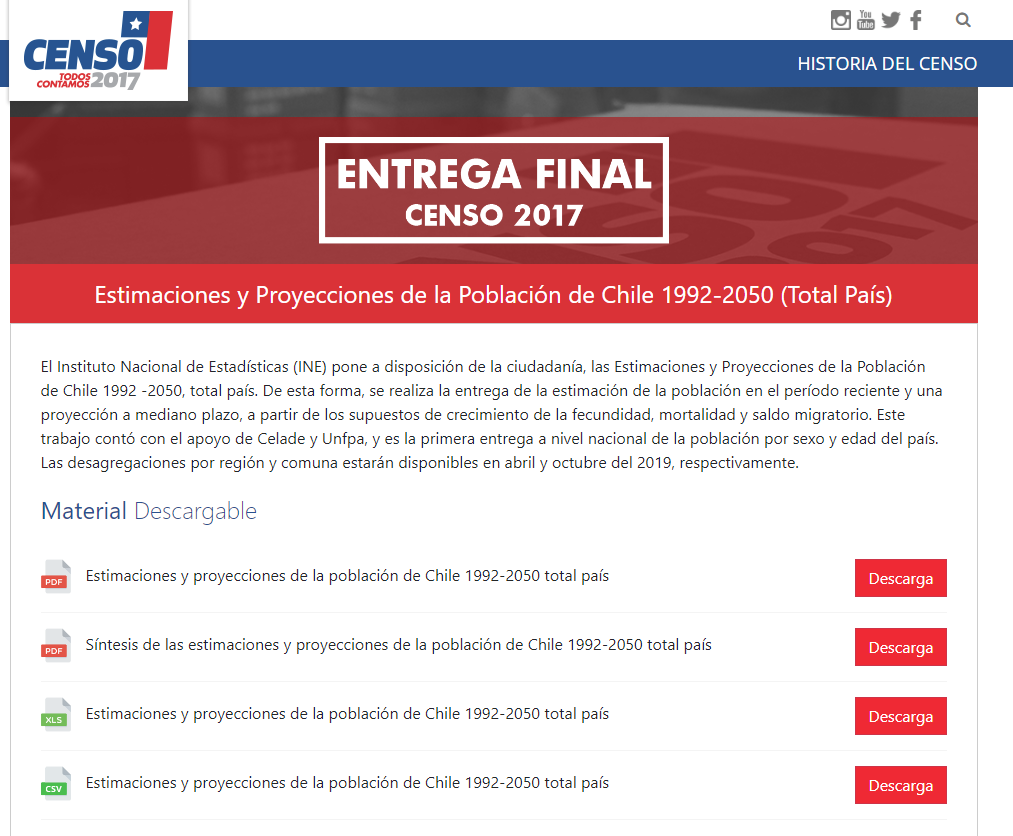

Finalmente, descomprimimos usando `zipfile`: https://docs.python.org/es/3.10/library/zipfile.html#zipfile-objects

In [ ]:
# dirección de los microdatos del censo 2017, que están publicados en formato comprimido .zip
url ='https://www.ine.gob.cl/docs/default-source/geodatos-abiertos/cartografia/censo-2017/siedu/shp/microdatos_manzana.zip?sfvrsn=972b0c54_3'

respuesta = requests.get(url, stream=True)

# Este dataset está en un archivo binario comprimido. Lo abrimos primero como un objeto tipo byte usando la librería io
archivoZip = zipfile.ZipFile(io.BytesIO(respuesta.content))

# Luego descomprimimos usando zipfile: https://docs.python.org/es/3.10/library/zipfile.html#zipfile-objects
archivoZip.extractall()

In [ ]:
%ls Censo2017_16R_ManzanaEntidad_CSV

Ahora podemos abrir el archivo descargado y descomprimido. En este caso está en formato CSV que ya sabemos leer usando Pandas.

In [ ]:
dat_manz = pd.read_csv('Censo2017_16R_ManzanaEntidad_CSV/Censo2017_Manzanas.csv',delimiter=';')
print(dat_manz.head())

Tratemos de hacer lo mismo ahora con la base de datos abierta de películas que está disponible en https://www.omdbapi.com/.

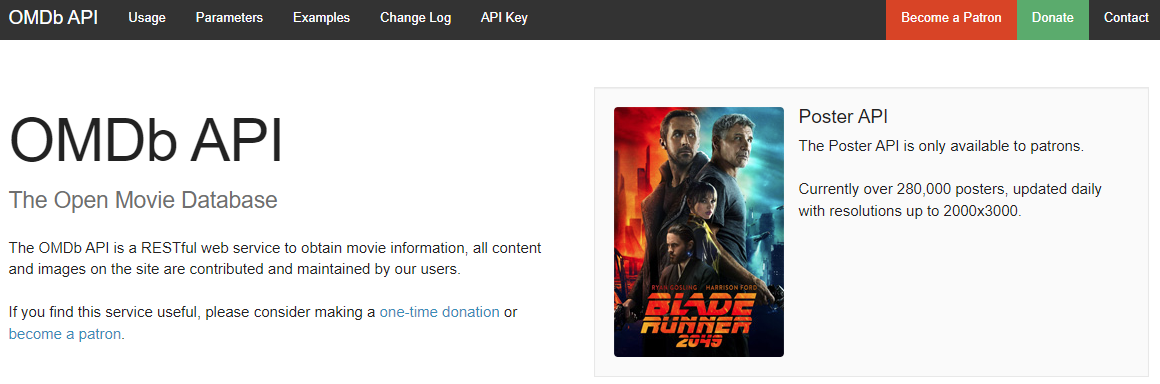

In [ ]:
url = 'http://www.omdbapi.com/?t=adventure&y=1945'
respuesta = requests.get(url)

In [ ]:
datos = respuesta.json()
datos

## 4. API

Una API es un conjunto de protocolos y rutinas que define cómo una aplicación (o programa) se comunica con otros programas, y vice-versa, pudiendo estar uno de esos programas en un lugar remoto.

Una forma standard de transferir data a través de una API es mediante el format JSON (acrónimo de JavaScript Object Notation) que ya hemos ocupado en el curso. Es un formato interpretable por humanos, y puede ser manejado mediante la librería `json` de Python como han hecho en clases anteriores.

Para obtener data de una API, debemos enviar una solicitud o "request". En este caso, el método `requests.get()` recibe el string de una URL desde donde obtener datos, y argumentos opcionales (keywords) útiles para trabajar con APIs hay tres elementos que nos interesan:
- `url`: dirección del recurso, más un string de query o consulta escrito de acuerdo a la documentación de cada API.
- `params`: permite entregar un diccionario con nombres y valores de parámetros para personalizar peticiones a la API.
- `headers`: también corresponde a un diccionario de cabeceras HTTP pasadas a la API, por ejemplo para autenticación del usuario.

El resultado es un objeto `response`, que contiene los datos y la metadata. El método `response.json()` permite acceder solamente a los datos.

### 4.1 API Open Notify ¿Cuántas personas hay en el espacio hoy?

Open Notify es proyecto que permite acceder, vía API, a algunos de los datos públicos de disponibiliza NASA.

En este caso, usaremos la API de Open Notify que entrega información actualizada de la ubicación de la Estación Espacial Internacional (ISS), y de las personas que están en el espacio.

http://open-notify.org/Open-Notify-API/People-In-Space/

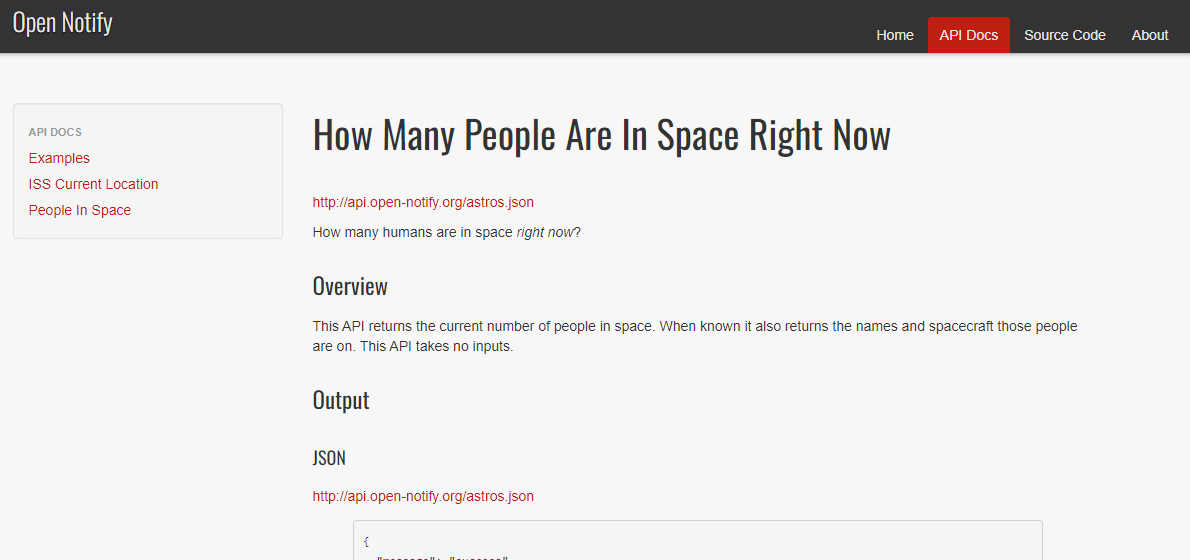

Esta es una API muy sencilla, que no tiene argumentos. Por lo tanto, la consulta que se le enviá es siempre la misma.

In [ ]:
url = 'http://api.open-notify.org/astros.json'

respuesta = requests.get(url)

In [ ]:
respuesta.json()

In [ ]:
df = pd.json_normalize(respuesta.json(), record_path='people')
df

In [ ]:
# ¿Dónde está la ISS ahora?
url = 'http://api.open-notify.org/iss-now.json'
respuesta = requests.get(url)
print(respuesta.json())

In [ ]:
# veamos uns segundos más tarde:
url = 'http://api.open-notify.org/iss-now.json'
respuesta = requests.get(url)
print(respuesta.json())

### 4.2 API para GitHub

Ahora repitamos el ejemplo de la clase pasada con GitHub pero conectándonos a su API

In [ ]:
BASE_URL = "https://api.github.com/search/repositories"
params = {
    "q": "pandas language:python",
    "sort": "stars",
    "order": "desc",
    "per_page": 10,  # resultados por página
    "page": 1
}
headers = {
    "Accept": "application/vnd.github+json",
    "User-Agent": "imt2200-class-notebook"
}

resp = requests.get(BASE_URL, params=params, headers=headers, timeout=15)
print("URL solicitada:", resp.url)
print("Status:", resp.status_code)
data = resp.json()
# Claves del JSON
list(data.keys())[:5]

In [ ]:
# Pasamos los items a un DataFrame con columnas elegidas
items = data.get("items", [])
df_gh = pd.json_normalize(items)[[
    "full_name","stargazers_count","forks_count","open_issues_count",
    "owner.login","html_url","description","language","created_at","updated_at"
]]
df_gh.head()

In [ ]:
# Ejemplo rápido de 'paginación': pedimos una segunda página y concatenamos
params["page"] = 2
resp2 = requests.get(BASE_URL, params=params, headers=headers, timeout=15)
items2 = resp2.json().get("items", [])
df_gh_page2 = pd.json_normalize(items2)

df_gh_all = pd.concat([df_gh, df_gh_page2], ignore_index=True)
print("Total filas:", len(df_gh_all))
df_gh_all.head(3)

### 4.3 API Yelp Fusion ¿Dónde puedo comer en Santiago?

Hay APIs más complejas, por ejemplo, la aplicación Yelp permite a los usuarios calificar y enviar comentarios sobre distintos negocios, y disponibiliza esta información mediante un conjunto de APIs.

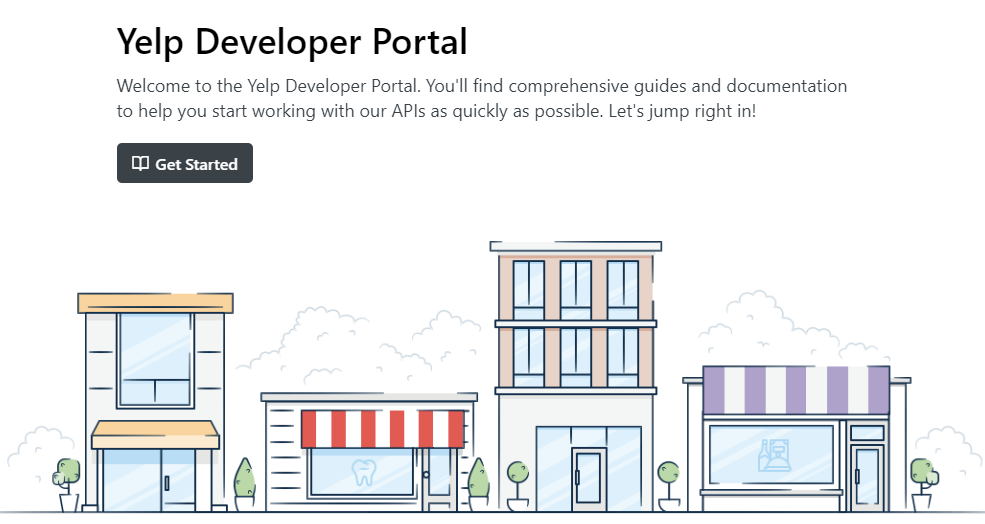

https://docs.developer.yelp.com/docs/fusion-intro

Para conectarse a estas APIs, se requiere una clave privada de autentificación (gratuita), que puede ser creada siguiendo las instrucciones en:

https://docs.developer.yelp.com/docs/fusion-authentication

En esje ejmplo, usaremos la API *Businesses Search* para obtenre un listado de restaurants en la ciudad de Santiago. La información requerida para hacer la búsqueda está disponible en:

https://docs.developer.yelp.com/reference/v3_business_search

Una característica importante de la API, es que entrega un máximo de 1000 resultados. Además, cada query tiene un límite de 50 resultados. Por lo tanto, es necesario iterar y realizar varias queries para obtener el máximo de 1000 registros. Para esto, se utiliza el parámetro `offset`, que permite ir avanzando en la lista.

In [ ]:
#url de la API
api_url = 'https://api.yelp.com/v3/businesses/search'

#datos de mi usuario y clave en Yelp
credenciales = open('yelp_user.txt','r')
clientid = credenciales.readline()[0:-1]
apikey = credenciales.readline()
credenciales.close()

#estos datos corresponden a una cuenta de usuario creada previamente
#clientid = 'XXXX'
#apikey = 'XXXX'
headers = {'Authorization':'Bearer %s'%apikey}

In [ ]:
params = {'term':'restaurants','location':'RM Santiago, Chile','limit':50}
response = requests.get(api_url,params=params,headers=headers)
data = response.json()
#print(data)
data.keys()
data['businesses']

In [ ]:
data['total']

La data entregada por la API de Yelp es un objeto en formato JSON anidado, es decir, un diccionario donde algunos de los valores de atributos corresponden a su vez a listas o diccionarios.

Como vimos anteriormente, podemos llevar estos datos a un formato "aplanado" o "flattened", utilizando la función `json_normalize()` :

https://pandas.pydata.org/docs/reference/api/pandas.json_normalize.html

In [ ]:
data['businesses'][0]

In [ ]:
#normalizamos el contenido del diccionario "businesses"
rests = pd.json_normalize(data["businesses"], sep='_', record_path=['categories'], meta=['name','price','rating','review_count','distance',['coordinates','latitude'],['coordinates','longitude'],['location','address1']], errors='ignore')

In [ ]:
rests

In [ ]:
#iteramos
offset = 0
allrests = []
while offset <= 150:
    print(offset)
    params = {'term':'restaurants','location':'RM Santiago, Chile','limit':50,'offset':offset}

    response = requests.get(api_url,params=params,headers=headers)
    data = response.json()
    #print(data)
    rests = pd.json_normalize(data["businesses"], sep='_', record_path=['categories'], meta=['name','price','rating','review_count','distance',['coordinates','latitude'],['coordinates','longitude'],['location','address1']], errors='ignore')

    allrests.append(rests)
    offset = offset+50

In [ ]:
allrests

In [ ]:
rests = pd.concat(allrests, ignore_index=True)
rests

In [ ]:
rests.info()